In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


### preprocessing

- transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])을 통해 데이터를 normalize하였다
- batch size를 4로 두었다
- 데이터를 train set과 test set으로 나누었다.

In [4]:
print(trainset)
print("-"*70)
print(testset)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
----------------------------------------------------------------------
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


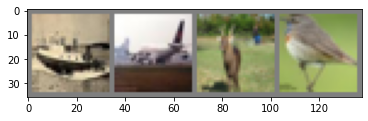

 ship plane  deer  bird


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize because, By default, imshow normalizes the data to its min and max.
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))


In [6]:
# initialize decision tree
dt_clf = DecisionTreeClassifier(random_state=0)

In [7]:
dt_clf.fit(trainset.data.reshape(50000, 3072), trainset.targets)

DecisionTreeClassifier(random_state=0)

reshape (training 데이터 포인터들의 갯수, 32 * 32 * 3 = RGB 3채널에 32 by 32 이미지)

In [8]:
pred = dt_clf.predict(testset.data.reshape(10000, 3072))

reshape(test 데이터 포인터들의 갯수, 32 * 32 * 3 )

Accuracy:  0.2686
F1 Score:  0.26847565152063463
Recall:  0.2686
Precision:  0.26865656656439174
----------------------------------------------------------------------


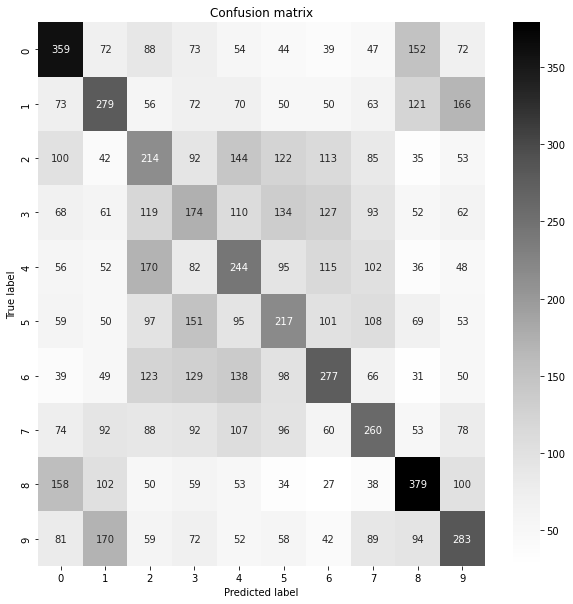

Classification Report:                precision    recall  f1-score   support

           0       0.34      0.36      0.35      1000
           1       0.29      0.28      0.28      1000
           2       0.20      0.21      0.21      1000
           3       0.17      0.17      0.17      1000
           4       0.23      0.24      0.24      1000
           5       0.23      0.22      0.22      1000
           6       0.29      0.28      0.28      1000
           7       0.27      0.26      0.27      1000
           8       0.37      0.38      0.37      1000
           9       0.29      0.28      0.29      1000

    accuracy                           0.27     10000
   macro avg       0.27      0.27      0.27     10000
weighted avg       0.27      0.27      0.27     10000



In [9]:
# accuracy
print("Accuracy: ", accuracy_score(testset.targets, pred))
print("F1 Score: ", f1_score(testset.targets, pred, average='macro'))
print("Recall: ", recall_score(testset.targets, pred, average='macro'))
print("Precision: ", precision_score(testset.targets, pred, average='macro'))
print("-"*70)

# visualize confusion matrix
cm = confusion_matrix(testset.targets, pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap='Greys')
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# classification report
print("Classification Report: ", classification_report(testset.targets, pred))

## Conclusion
* ### Decision Tree - OVERFITTING

It looks like the training is totally messed up

The Decision tree has a problem about **overfitting** with training set

Definitely apply another models

<hr>

## Score
* ### test score
  * Accuracy:  0.2686
  * F1 Score:  0.26847565152063463
  * Recall:  0.2686
  * Precision:  0.26865656656439174
  * 


<hr>

This is just for academic purpose
So, I ain't gonna evolve this by hyperparameter-tunings

Experiment anthoer model and let's get the right score!

This is very first experiment.

<hr>

### But gotta check the sequence and flow is correct